# Choosing appropriate model

In [207]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.set_printoptions(precision=2)

In [187]:
data = np.loadtxt('./data/data.csv', delimiter=',')

X = data[:, 0]
y = data[:, 1]

X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)

print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (50, 1), y shape: (50, 1)


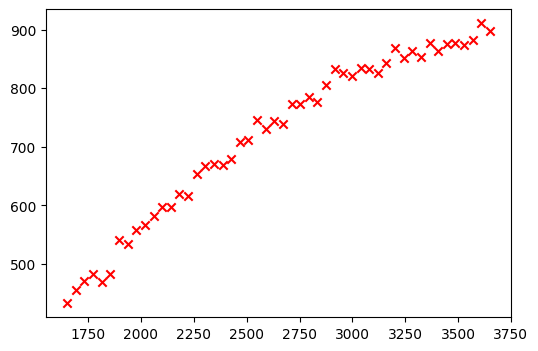

In [188]:
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c="r", marker="x", label="Input vs Data")
plt.show()

## Splitting the data
Splitting in 
- 60% training data
- 20% cross-validation data
- 20% test data


In [189]:
X_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=1) # using temporary variables x_, y_
X_cv, X_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

del x_, y_

print(f"the shape of the training set (input) is: {X_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {X_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {X_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (30, 1)
the shape of the training set (target) is: (30, 1)

the shape of the cross validation set (input) is: (10, 1)
the shape of the cross validation set (target) is: (10, 1)

the shape of the test set (input) is: (10, 1)
the shape of the test set (target) is: (10, 1)


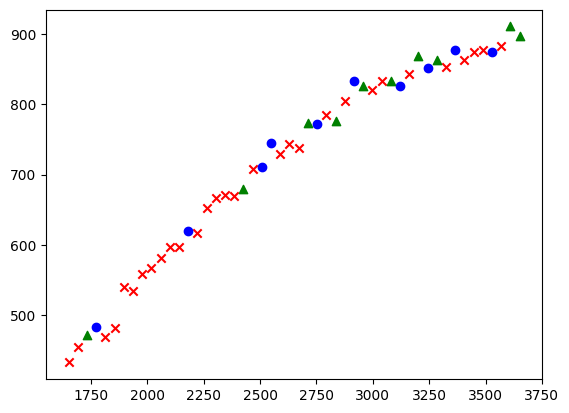

In [190]:
def plotData(x_train, y_train, x_cv=None, y_cv=None, x_test=None, y_test=None):
  plt.scatter(x_train, y_train, marker='x', c='r', label='Training set')
  plt.scatter(x_cv, y_cv, marker='o', c='b', label='Cross Validation set')
  plt.scatter(x_test, y_test, marker='^', c='g', label='Test set')
  plt.show()

plotData(X_train, y_train, X_cv, y_cv, X_test, y_test)

## Fitting a linear model

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


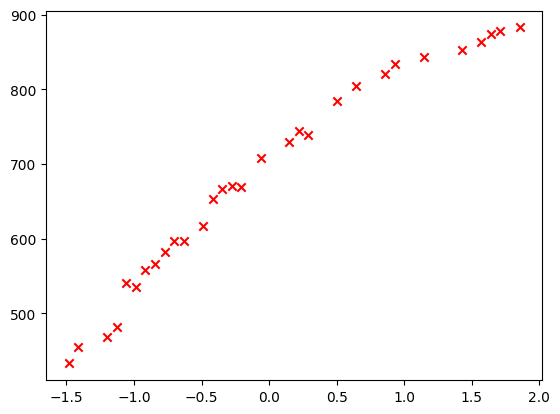

In [191]:
linear_scaler = StandardScaler()
X_train_scaled = linear_scaler.fit_transform(X_train)

print(f"Computed mean of the training set: {linear_scaler.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {linear_scaler.scale_.squeeze():.2f}")

plotData(X_train_scaled, y_train)

In [192]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

In [193]:
yhat = linear_model.predict(X_train_scaled)

mean_squared_error(y_train, yhat) / 2 # dividing by 2 coz -> 1 / (2 * m)

406.19374192533155

In [194]:

# ! Using the training data standard deviation and mean that's why using scalar.transform
# ! and not scalar.fit_transform()

X_cv_scaled = linear_scaler.transform(X_cv)
y_cv_hat = linear_model.predict(X_cv_scaled)

print("std used: ", linear_scaler.scale_, ", mean used: ", linear_scaler.mean_)

mean_squared_error(y_cv, y_cv_hat) / 2

std used:  [574.85] , mean used:  [2504.06]


551.7789026952216

## Using Polynomial Scaling

In [195]:
poly = PolynomialFeatures(degree=2, include_bias=False) # Not including bias
X_train_mapped = poly.fit_transform(X_train) # for X_train calculate the values till x^2

print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


In [196]:
scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


In [197]:
model = LinearRegression()

model.fit(X_train_mapped_scaled, y_train)

yhat = model.predict(X_train_mapped_scaled)
print(f"Trained MSE: ", mean_squared_error(y_train, yhat) / 2)

# # Cross Validation set
X_cv_mapped = poly.transform(X_cv) # adding new features -> Transform gives values to the polynomials in po
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped) # Scaling
yhat_cv = model.predict(X_cv_mapped_scaled) 

print(f"Cross Validation MSE: ", mean_squared_error(y_cv, yhat_cv) / 2)

Trained MSE:  49.111609334025154
Cross Validation MSE:  87.6984121111191


## Finding the best model by checking fo every degree

In [198]:
print("{:<10} {:<20} {:<20}".format("Degree", "Training Cost", "CV Cost"))

train_costs: list[float] = []
cv_costs: list[float] = []
polys = []
models = []
scalars = []

for i in range(1, 11):
  poly_scaler = StandardScaler()
  model = LinearRegression()
  poly = PolynomialFeatures(degree=i, include_bias=False)

  X_mapped = poly.fit_transform(X_train)
  X_mapped_scaled = poly_scaler.fit_transform(X_mapped)

  model.fit(X_mapped_scaled, y_train)

  y_train_pred = model.predict(X_mapped_scaled)

  training_cost: float = mean_squared_error(y_train, y_train_pred) / 2

  X_cv_mapped = poly.transform(X_cv)
  X_cv_mapped_scaled = poly_scaler.transform(X_cv_mapped)

  y_cv_pred = model.predict(X_cv_mapped_scaled)
  cv_cost: float = mean_squared_error(y_cv, y_cv_pred) / 2

  polys.append(poly)
  models.append(model)
  train_costs.append(training_cost)
  cv_costs.append(cv_cost)
  scalars.append(poly_scaler)
  
  print("{:<10} {:<20.2f} {:<20.2f}".format(i, training_cost, cv_cost))


Degree     Training Cost        CV Cost             
1          406.19               551.78              
2          49.11                87.70               
3          47.62                81.15               
4          47.15                79.43               
5          47.14                79.59               
6          41.38                98.74               
7          39.25                99.32               
8          38.98                99.05               
9          37.97                109.59              
10         37.04                121.85              


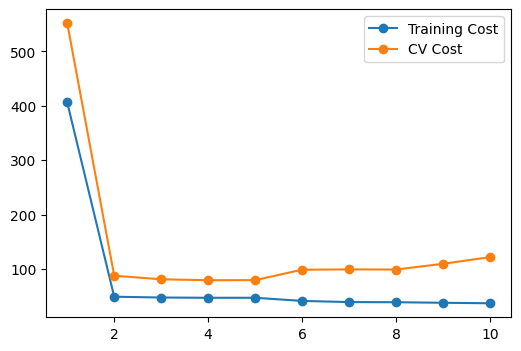

In [199]:
# Plotting
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), train_costs, marker="o")
plt.plot(range(1, 11), cv_costs, marker="o")
plt.legend(["Training Cost", "CV Cost"])
plt.show()

In [200]:
# Best model -
best_degree = np.argmin(cv_costs) + 1
best_model = models[best_degree - 1]
best_poly = polys[best_degree - 1]
best_scalar = scalars[best_degree - 1]

print("Best Degree: ", best_degree)

Best Degree:  4


In [208]:
# Testing
X_test_mapped = best_poly.transform(X_test)
X_test_mapped_scaled = best_scalar.transform(X_test_mapped)

y_test_pred = best_model.predict(X_test_mapped_scaled)

y_test_mse = mean_squared_error(y_test, y_test_pred) / 2
print(f"Y test MSE: ", y_test_mse)

Y test MSE:  104.6316820528975
